In [61]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# Shared functions

In [63]:
def convert_to_boolean_labels(labels):
    return np.where(labels >= 0.5, True, False)

In [64]:
def scatterplot(results, model_1, model_2, y_label, ylim=(0.8, 1.0)):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    #bar_width = 0.35
    point_size=15
    for i, (_index, row) in enumerate(results.iterrows()):
        # For each subgroup, we plot a 1D scatterplot. The x-value is the position
        # of the item in the dataframe. To change the ordering of the subgroups,
        # sort the dataframe before passing to this function.
        x = [i] * 2
        y = [row[model_1], row[model_2]]
        ax.scatter(x, y, s=0)
        #if (abs(y[1] - y[0]) > 0.003):
        plt.arrow(x[0],y[0], 0, y[1] - y[0], length_includes_head=True, shape='full', head_starts_at_zero=False, head_length=0.005, head_width=0.3, color='black')
    ax.set_xticklabels(results['subgroup'], rotation=90)
    ax.set_xticks(range(len(results)))
    ax.set_ylim(ylim)
    ax.set_title(y_label)
    fig.tight_layout()
    #fig.savefig('/tmp/%s_%s.eps' % (file_name, values_col), format='eps')

In [65]:
# MADLIBS set up

In [66]:
models = [
    'Rock:TOXICITY',
    'RockV5_1:TOXICITY',
    'RockV6_1:TOXICITY',
]

In [67]:
madlibs = pd.read_csv('eval_datasets/bias_madlibs_77k_scored_prod_models.csv')

In [68]:
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'Text', terms)

In [69]:
madlibs['label_bool'] = madlibs.apply(lambda row: row.Label == 'BAD', axis=1)

In [70]:
madlibs_results = model_bias_analysis.compute_bias_metrics_for_models(madlibs, terms, models, 'label_bool')

In [71]:
# Real Data set up 

In [72]:
human_labels = [
 'toxicity',
 'severe_toxicity',
 'obscene',
 'sexual_explicit',
 'identity_attack',
 'insult',
 'threat',
 'male',
 'female',
 'transgender',
 'other_gender',
 'heterosexual',
 'homosexual_gay_or_lesbian',
 'bisexual',
 'other_sexual_orientation',
 'christian',
 'jewish',
 'muslim',
 'hindu',
 'buddhist',
 'atheist',
 'other_religion',
 'black',
 'white',
 'asian',
 'latino',
 'other_race_or_ethnicity',
 'physical_disability',
 'intellectual_or_learning_disability',
 'psychiatric_or_mental_illness',
 'other_disability']

identities = [
 'male',
 'female',
 'transgender',
 'heterosexual',
 'homosexual_gay_or_lesbian',
 'bisexual',
 'christian',
 'jewish',
 'muslim',
 'hindu',
 #'buddhist',
 'atheist',
 'other_religion',
 'black',
 'white',
 'asian',
 'latino',
 'other_race_or_ethnicity',
 #'physical_disability',
 'intellectual_or_learning_disability',
 'psychiatric_or_mental_illness']

In [73]:
real_data = pd.read_csv('eval_datasets/identity_labeled_scored.csv')

In [74]:
real_data_models = ['rock_toxicity', 'rock_v6_1_toxicity']

In [75]:
for human_label in human_labels:
    real_data[human_label] = convert_to_boolean_labels(real_data[human_label])

In [76]:
real_data = real_data[(real_data.comment_text.str.len() < 100)]

In [77]:
len(real_data)

480897

In [78]:
real_data_results = model_bias_analysis.compute_bias_metrics_for_models(real_data, identities, real_data_models, 'toxicity')

In [79]:
# RESULTS

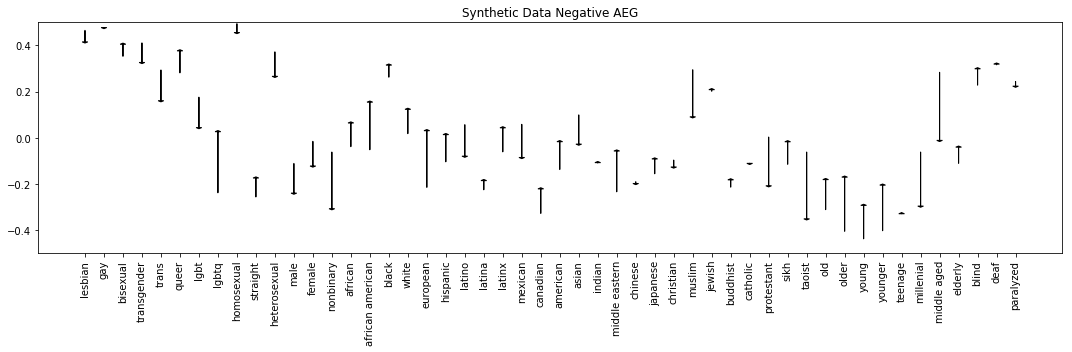

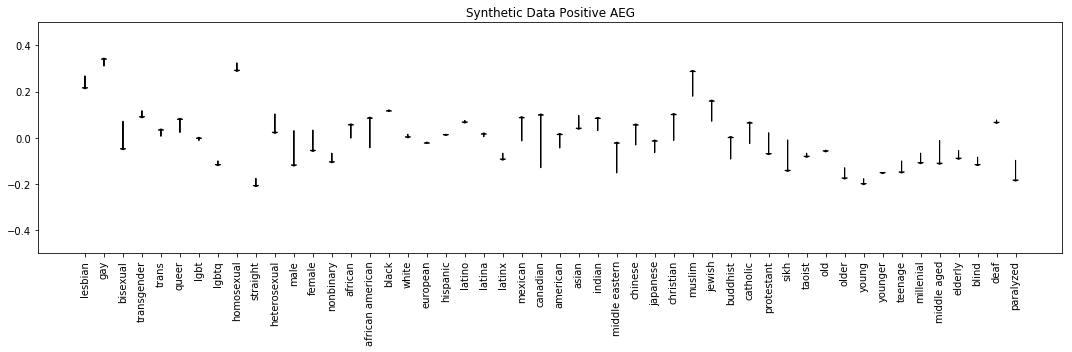

In [80]:
scatterplot(madlibs_results, 'Rock:TOXICITY_negative_aeg', 'RockV6_1:TOXICITY_negative_aeg', 'Synthetic Data Negative AEG', ylim=(-0.5,0.5))
scatterplot(madlibs_results, 'Rock:TOXICITY_positive_aeg', 'RockV6_1:TOXICITY_positive_aeg', 'Synthetic Data Positive AEG', ylim=(-0.5,0.5))

In [81]:
# REAL DATA

In [82]:
real_data_results

,rock_toxicity_negative_aeg,rock_toxicity_negative_cross_auc,rock_toxicity_positive_aeg,rock_toxicity_positive_cross_auc,rock_toxicity_subgroup_auc,subgroup,subset_size,rock_v6_1_toxicity_negative_aeg,rock_v6_1_toxicity_negative_cross_auc,rock_v6_1_toxicity_positive_aeg,rock_v6_1_toxicity_positive_cross_auc,rock_v6_1_toxicity_subgroup_auc
0,0.132004,0.912435,-0.034193,0.941778,0.905344,male,4877,0.116253,0.930743,-0.047021,0.950209,0.919895
1,0.171680,0.900022,-0.043220,0.936900,0.883307,female,4004,0.176721,0.918163,-0.038354,0.947000,0.899304
2,0.337123,0.823198,-0.174792,0.924981,0.740532,transgender,183,0.269645,0.889995,-0.178866,0.896024,0.768658
3,0.342394,0.727690,-0.027705,0.937055,0.721014,heterosexual,58,0.211658,0.874545,-0.189757,0.934144,0.793478
4,0.432745,0.574651,0.104925,0.981038,0.705605,homosexual_gay_or_lesbian,743,0.297394,0.824502,-0.078874,0.927532,0.768287
5,0.328307,0.821191,-0.082739,0.936826,0.825000,bisexual,18,0.178914,0.908267,-0.182234,0.911510,0.837500
6,0.124348,0.931745,-0.089219,0.927479,0.908091,christian,2321,0.091935,0.944838,-0.110199,0.937015,0.920346
7,0.338841,0.793965,-0.026794,0.952978,0.795529,jewish,394,0.328738,0.841121,-0.070236,0.949518,0.807694
8,0.335690,0.812741,-0.064664,0.941234,0.782752,muslim,1624,0.264992,0.882697,-0.130723,0.929485,0.812553
9,0.124516,0.948589,-0.018074,0.965417,0.956522,hindu,26,0.084734,0.935417,-0.179336,0.961519,0.927536


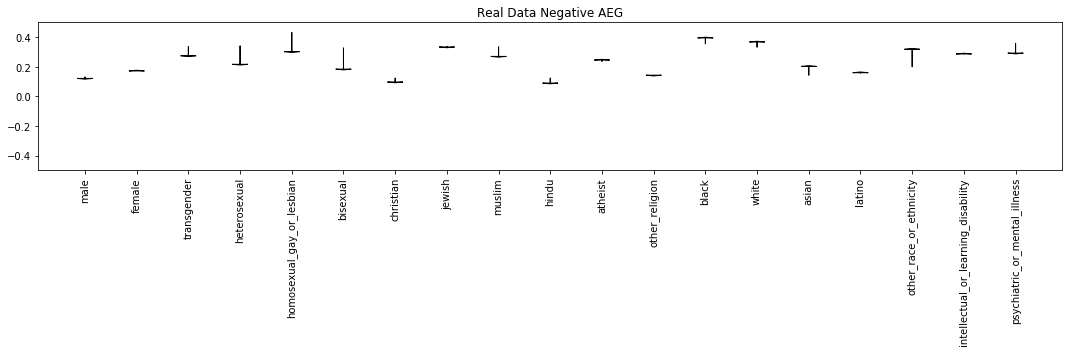

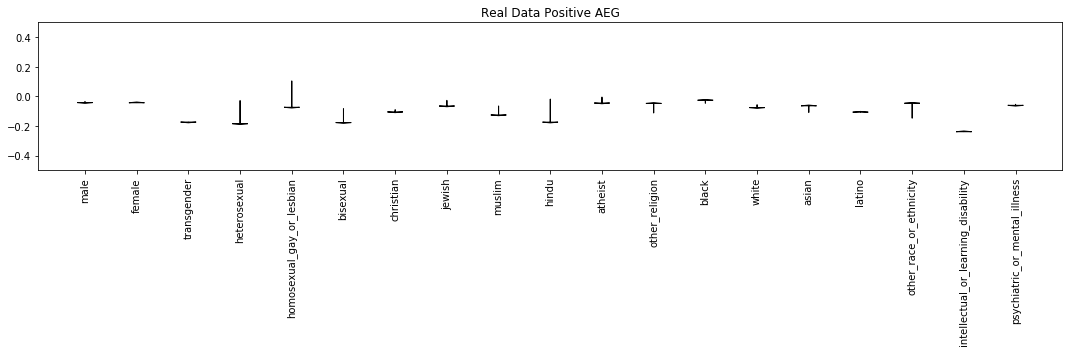

In [83]:
scatterplot(real_data_results, 'rock_toxicity_negative_aeg', 'rock_v6_1_toxicity_negative_aeg', 'Real Data Negative AEG', ylim=(-0.5,0.5))
scatterplot(real_data_results, 'rock_toxicity_positive_aeg', 'rock_v6_1_toxicity_positive_aeg', 'Real Data Positive AEG', ylim=(-0.5,0.5))

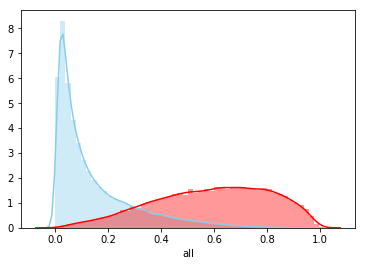

In [84]:
toxic_scores = real_data.query('toxicity == True')['rock_toxicity']
non_toxic_scores = real_data.query('toxicity == False')['rock_toxicity']
sns.distplot( non_toxic_scores , color="skyblue", axlabel='all')
sns.distplot( toxic_scores , color="red", axlabel='all')
plt.figure()

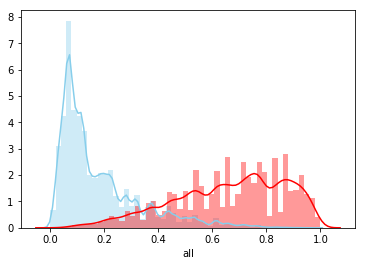

In [85]:
toxic_scores = real_data.query('toxicity == True')['rock_v6_1_toxicity']
non_toxic_scores = real_data.query('toxicity == False')['rock_v6_1_toxicity']
sns.distplot( non_toxic_scores , color="skyblue", axlabel='all')
sns.distplot( toxic_scores , color="red", axlabel='all')
plt.figure()

In [86]:
def plot_histogram(data, identity, model, label_col='toxicity'):
    toxic_scores = data.query(identity + ' == True & ' + label_col + ' == True')[model]
    non_toxic_scores = data.query(identity + ' == True & '+ label_col + ' == False')[model]
    sns.distplot( non_toxic_scores , color="skyblue", axlabel=identity)
    sns.distplot( toxic_scores , color="red", axlabel=identity)
    plt.figure()

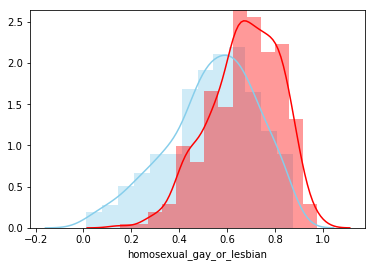

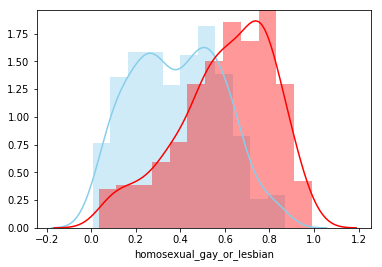

In [87]:
plot_histogram(real_data, 'homosexual_gay_or_lesbian', 'rock_toxicity')
plot_histogram(real_data, 'homosexual_gay_or_lesbian', 'rock_v6_1_toxicity')

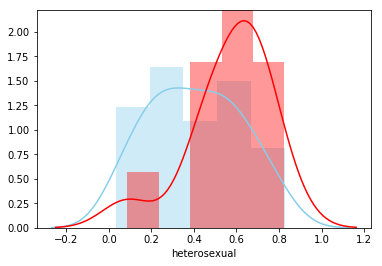

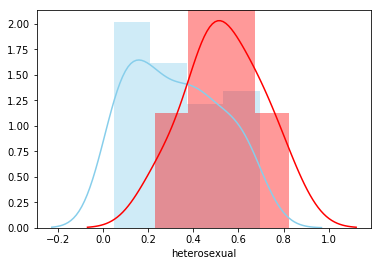

In [88]:
plot_histogram(real_data, 'heterosexual', 'rock_toxicity')
plot_histogram(real_data, 'heterosexual', 'rock_v6_1_toxicity')


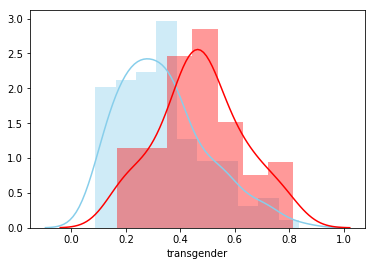

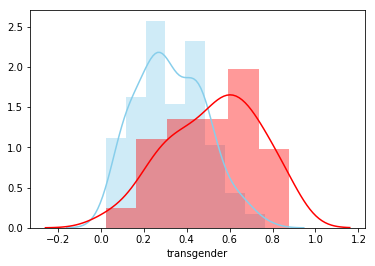

In [89]:
plot_histogram(real_data, 'transgender', 'rock_toxicity')
plot_histogram(real_data, 'transgender', 'rock_v6_1_toxicity')

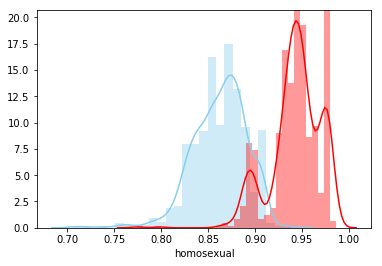

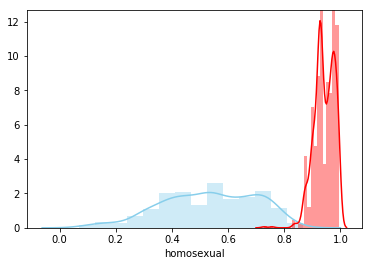

In [90]:
plot_histogram(madlibs, 'homosexual', 'Rock:TOXICITY', label_col='label_bool')
#plot_histogram(madlibs, 'homosexual', 'RockV5_1:TOXICITY', label_col='label_bool')
plot_histogram(madlibs, 'homosexual', 'RockV6_1:TOXICITY', label_col='label_bool')

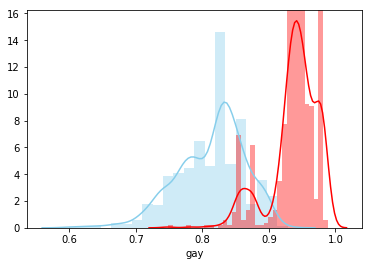

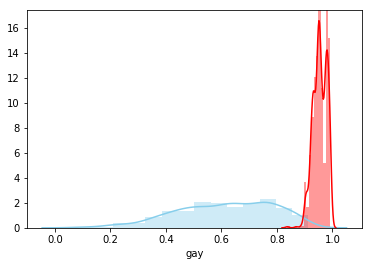

In [91]:
plot_histogram(madlibs, 'gay', 'Rock:TOXICITY', label_col='label_bool')
#plot_histogram(madlibs, 'gay', 'RockV5_1:TOXICITY', label_col='label_bool')
plot_histogram(madlibs, 'gay', 'RockV6_1:TOXICITY', label_col='label_bool')

In [92]:
real_data['diff'] = real_data['rock_v6_1_toxicity'] - real_data['rock_toxicity']

In [93]:
look = real_data[real_data['homosexual_gay_or_lesbian'] & (real_data.comment_text.str.len() < 100)].sort_values('diff', ascending=False)[['comment_text', 'rock_v6_1_toxicity', 'rock_toxicity', 'toxicity']]

In [94]:
pd.options.display.max_colwidth=200

In [95]:
look[~look.toxicity]

,comment_text,rock_v6_1_toxicity,rock_toxicity,toxicity
1406764,I agree the law should. But adding gays to if won't do that. Elimination of the law will.,0.654985,0.269230,False
974324,How can ANYBODY question the republicans love for gay people. Moore is a standard republican. Lol,0.665536,0.327469,False
35079,So gay CIVIL marriages are not sacramental marriages. So what?,0.668758,0.371487,False
1749323,i hear some believe the fires were caused by tolerance of homosexuality :D :D :D,0.766661,0.497704,False
74918,How is our right to worship hurting the LGBT community.,0.462051,0.194926,False
1103407,this anchor character would have a fit if this were done to Gays.\nwhat ya think anchor.,0.714343,0.447837,False
70336,Reminds me of the APA and the protests which led them to remove homosexuality from the DSM.,0.627050,0.378100,False
514387,"all_married_couples_do,_including_the_gay_ones.",0.498279,0.252223,False
1330819,Homos demand that you accept their fudge packing. But none of us ever will-,0.763128,0.543329,False
1011074,Who was it campaigning for gay marriage rights then?,0.422096,0.207238,False
